# Découverte du jeu de données


## Import

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# On supprimer les warnings
import warnings
warnings.filterwarnings("ignore")

## Partie importante

In [2]:
train_path = os.path.abspath(os.path.dirname(__name__)) + '\\petfinder-adoption-prediction\\train\\train.csv'

# Lecture du fichier des données d'entrainement
df = pd.read_csv(train_path, sep=',')

# On récupère les noms de colonnes
columns_names = list(df.columns.values)
print(columns_names)

['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed']


In [3]:
# On affiche les données
df.drop(columns=['Name', 'Description', 'RescuerID'])
print(df)

       Type                                 Name  Age  Breed1  Breed2  Gender  \
0         2                               Nibble    3     299       0       1   
1         2                          No Name Yet    1     265       0       1   
2         1                               Brisco    1     307       0       1   
3         1                                 Miko    4     307       0       2   
4         1                               Hunter    1     307       0       1   
5         2                                  NaN    3     266       0       2   
6         2                                BULAT   12     264     264       1   
7         1              Siu Pak & Her 6 Puppies    0     307       0       2   
8         2                                  NaN    2     265       0       2   
9         2                                Kitty   12     265       0       2   
10        1                                 Bear    2     307       0       1   
11        2                 

In [4]:
"""
    À la simple vision des noms de colonnes on peut très vite s'orienter vers un calcul de corrélations avec la rapidité d'adoption :
        - Vaccinated
        - Dewormed
"""
correlation = df.corr(method='pearson')
print(correlation)

                   Type       Age    Breed1    Breed2    Gender    Color1  \
Type           1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680   
Age           -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378   
Breed1         0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510   
Breed2        -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324   
Gender         0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351   
Color1         0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000   
Color2         0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290   
Color3         0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize  -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468   
FurLength      0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated     0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475   
Dewormed       0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318   

In [5]:
# Pour seuiller les valeurs : on utilise la fonction where comme pour une bdd
cor_seuil = 0.5
correlated = correlation.where((correlation > cor_seuil) | (correlation < -cor_seuil))
print(correlated)
# TODO : Récupérer les valeurs d'index et de colonnes pour des variables corrélées

               Type  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
Type            1.0  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Age             NaN  1.0     NaN     NaN     NaN     NaN     NaN     NaN   
Breed1          NaN  NaN     1.0     NaN     NaN     NaN     NaN     NaN   
Breed2          NaN  NaN     NaN     1.0     NaN     NaN     NaN     NaN   
Gender          NaN  NaN     NaN     NaN     1.0     NaN     NaN     NaN   
Color1          NaN  NaN     NaN     NaN     NaN     1.0     NaN     NaN   
Color2          NaN  NaN     NaN     NaN     NaN     NaN     1.0     NaN   
Color3          NaN  NaN     NaN     NaN     NaN     NaN     NaN     1.0   
MaturitySize    NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
FurLength       NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Vaccinated      NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Dewormed        NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Sterilized  

In [6]:
correlated.index[correlation['Vaccinated'] > 0.5].tolist()

['Vaccinated', 'Dewormed']

In [7]:
col_names = correlated.columns.values.tolist()
assoc = {}
for col in col_names:
    resp = correlation.index[correlation[col] > cor_seuil].tolist()
    resp.remove(col)
    if len(resp) > 0:
        assoc[col] = resp
print(assoc)

{'Vaccinated': ['Dewormed'], 'Dewormed': ['Vaccinated']}


In [8]:
X = df.drop(columns=['Name', 'RescuerID', 'Description', 'PetID'])
sc = StandardScaler()
Z = sc.fit_transform(X)
acp = PCA(svd_solver='full')
res_acp = acp.fit_transform(Z)

In [9]:
print("Valeurs de variance : {}".format(acp.explained_variance_))
print("Les composantes selectionnées : {}".format(acp.singular_values_))
print("Explication de l'information : {}".format(acp.explained_variance_ratio_))

Valeurs de variance : [2.43840018 1.85562259 1.47426881 1.39698685 1.21649742 1.12745265
 1.09497438 0.98286833 0.95172336 0.93867306 0.91506609 0.88484331
 0.81163845 0.77290017 0.72909964 0.60924004 0.55562467 0.49282012
 0.48745724 0.26517666]
Les composantes selectionnées : [191.19753019 166.79176806 148.66821473 144.71913117 135.04713757
 130.01065416 128.12437663 121.38847572 119.44972443 118.62793318
 117.12672969 115.17626002 110.30903733 107.64441184 104.5498053
  95.57053245  91.26842284  85.95556521  85.48660095  63.05179207]
Explication de l'information : [0.12191188 0.09277494 0.07370852 0.06984468 0.06082081 0.05636887
 0.05474507 0.04914014 0.04758299 0.04693052 0.04575025 0.04423921
 0.04057922 0.03864243 0.03645255 0.03045997 0.02777938 0.02463936
 0.02437124 0.01325795]


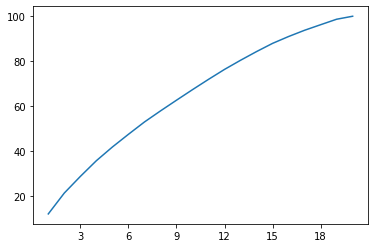

In [20]:
y_plt = [sum(acp.explained_variance_ratio_[0:i+1])*100 for i in range(len(acp.explained_variance_ratio_))]
x_plt = list(range(1, 21))
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(x_plt, y_plt)